# Name Generator - Part 2: TLDR

In [201]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

names = open('names.txt', 'r').read().splitlines()

In [202]:
chars = ['.'] + sorted(set(list(''.join(names))))

stoi = {}
itos = {}
for i,s in enumerate(chars):
    itos[i] = s
    stoi[s] = i

In [203]:
def create_training_data(block_size = 3, num_examples = -1):
    X = []
    Y = []

    for name in names[:num_examples]:
        context = [0] * block_size
        for char in name + '.':
            charIdx = stoi[char]
            X.append(context)
            Y.append(charIdx)
            context = context[1:] + [charIdx]
            
    return (torch.tensor(X), torch.tensor(Y))
        
(X, Y) = create_training_data(block_size = 3, num_examples=1)

In [204]:
embed_size = 2
hidden_layer_size = 100

In [205]:
C = torch.randn((len(chars), embed_size))
W1 = torch.randn(X.shape[1] * embed_size, hidden_layer_size)
b1 = torch.randn(hidden_layer_size)

In [206]:
print('X', X.shape)
print('C', C.shape)
print('W1', W1.shape)

X torch.Size([5, 3])
C torch.Size([27, 2])
W1 torch.Size([6, 100])


Inputs to first layer will be embedding table for training set

In [207]:
embed = C[X]
embed.shape

torch.Size([5, 3, 2])

In [208]:
print('embed view', embed.view(-1, 6).shape)
print('W1', embed.view(-1, 6).shape)

embed view torch.Size([5, 6])
W1 torch.Size([5, 6])


In [209]:
h = torch.tanh(embed.view(-1, 6) @ W1 + b1)

In [210]:
W2 = torch.randn((hidden_layer_size, 27))
b2 = torch.randn(27)

In [211]:
print('h', h.shape)
print('W2', W2.shape)

h torch.Size([5, 100])
W2 torch.Size([100, 27])


In [212]:
logits = h @ W2 + b2
loss = F.cross_entropy(logits, Y)

In [213]:
parameters = [C, W1, b1, W2, b2]
for parameter in parameters:
    parameter.requires_grad = True

In [214]:
for i in range(10):
    embed = C[X]
    h = torch.tanh(embed.view(-1, 6) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y)
    print(loss)
    
    for parameter in parameters:
        parameter.grad = None
    loss.backward()
    
    for parameter in parameters:
        parameter.data += -0.1 * parameter.grad

tensor(16.3242, grad_fn=<NllLossBackward0>)
tensor(8.7062, grad_fn=<NllLossBackward0>)
tensor(3.7942, grad_fn=<NllLossBackward0>)
tensor(2.2180, grad_fn=<NllLossBackward0>)
tensor(1.5613, grad_fn=<NllLossBackward0>)
tensor(1.0471, grad_fn=<NllLossBackward0>)
tensor(0.6249, grad_fn=<NllLossBackward0>)
tensor(0.3250, grad_fn=<NllLossBackward0>)
tensor(0.1798, grad_fn=<NllLossBackward0>)
tensor(0.1177, grad_fn=<NllLossBackward0>)


In [215]:
block_size = 3
(X, Y) = create_training_data(block_size = block_size)

C = torch.randn((len(chars), embed_size))
W1 = torch.randn((block_size * embed_size, hidden_layer_size))
b1 = torch.randn(hidden_layer_size)
W2 = torch.randn((hidden_layer_size, len(chars)))
b2 = torch.randn(len(chars))
parameters = [C, W1, b1, W2, b2]
for parameter in parameters:
    parameter.requires_grad = True

for i in range(10):
    embed = C[X]
    h = torch.tanh(embed.view(-1, 6) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y)
    print(loss)
    
    for parameter in parameters:
        parameter.grad = None
    loss.backward()
    
    for parameter in parameters:
        parameter.data += -0.1 * parameter.grad

tensor(18.1794, grad_fn=<NllLossBackward0>)
tensor(16.7289, grad_fn=<NllLossBackward0>)
tensor(15.6544, grad_fn=<NllLossBackward0>)
tensor(14.7800, grad_fn=<NllLossBackward0>)
tensor(13.9975, grad_fn=<NllLossBackward0>)
tensor(13.2961, grad_fn=<NllLossBackward0>)
tensor(12.6734, grad_fn=<NllLossBackward0>)
tensor(12.1297, grad_fn=<NllLossBackward0>)
tensor(11.6558, grad_fn=<NllLossBackward0>)
tensor(11.2384, grad_fn=<NllLossBackward0>)


In [216]:
X.shape

torch.Size([228140, 3])

To create a minibatch, we want to pick X amount of integers to index into `C[X]`, which has 228,140 entries.

In [217]:
ix = torch.randint(0, X.shape[0], (32,))
ix

tensor([189697,  10048, 109075,  64467,  16111, 170257, 123401, 164898, 109578,
         70169,  29334,  41806, 187298,  57594,  92337,  33467, 204815, 147390,
         85325, 168186, 124738, 167456,  72819, 128041, 141053,  89293,  56854,
        198739, 107771, 201586,  82269, 103768])

2.5881264209747314

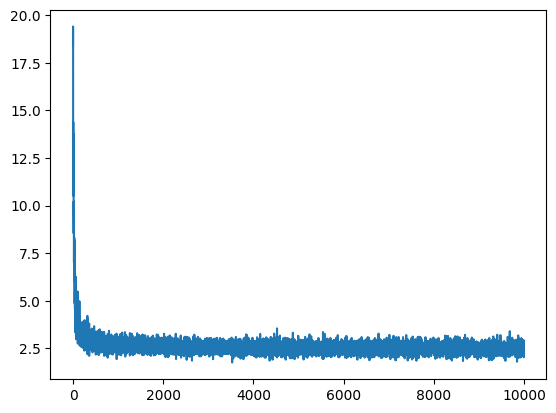

In [218]:
block_size = 3
(X, Y) = create_training_data(block_size = block_size)

C = torch.randn((len(chars), embed_size))
W1 = torch.randn((block_size * embed_size, hidden_layer_size))
b1 = torch.randn(hidden_layer_size)
W2 = torch.randn((hidden_layer_size, len(chars)))
b2 = torch.randn(len(chars))

parameters = [C, W1, b1, W2, b2]
for parameter in parameters:
    parameter.requires_grad = True

losses = []
    
for i in range(10000):
    ix = torch.randint(0, X.shape[0], (32,))
    
    embed = C[X[ix]]
    h = torch.tanh(embed.view(-1, 6) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y[ix])
    losses.append(loss.item())
    
    for parameter in parameters:
        parameter.grad = None
    loss.backward()
    
    for parameter in parameters:
        parameter.data += -0.1 * parameter.grad
        
plt.plot(torch.arange(len(losses)), losses)
losses[-1]

Let's try and tweak the neural net

2.256518602371216

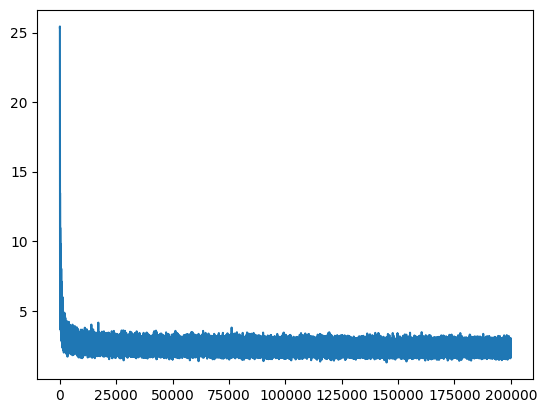

In [219]:
embed_size = 10
block_size = 3
hidden_layer_size = 200

(X, Y) = create_training_data(block_size = block_size)

C = torch.randn((len(chars), embed_size))
W1 = torch.randn((block_size * embed_size, hidden_layer_size))
b1 = torch.randn(hidden_layer_size)
W2 = torch.randn((hidden_layer_size, len(chars)))
b2 = torch.randn(len(chars))

parameters = [C, W1, b1, W2, b2]
for parameter in parameters:
    parameter.requires_grad = True

losses = []
    
for i in range(200000):
    ix = torch.randint(0, X.shape[0], (32,))
    
    embed = C[X[ix]]
    h = torch.tanh(embed.view(-1, block_size * embed_size) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y[ix])
    losses.append(loss.item())
    
    for parameter in parameters:
        parameter.grad = None
    loss.backward()
    
    for parameter in parameters:
        parameter.data += -0.1 * parameter.grad
        
plt.plot(torch.arange(len(losses)), losses)
losses[-1]

In [220]:
for _ in range(30):
    out = []
    context = [0] * block_size
    while True:
        emb = C[torch.tensor([context])] # get embedding for current 3 chars
        h = torch.tanh(emb.view(1, -1) @ W1 + b1)
        logits = h @ W2 + b2
        probs = F.softmax(logits, dim=1) # convert log counts to probability distribution
        ix = torch.multinomial(probs, num_samples=1).item()
        context = context[1:] + [ix]
        out.append(ix)
        if ix == 0:
            break
    
    print(''.join(itos[i] for i in out))

oaklynna.
lew.
kysian.
nyia.
gerroway.
shana.
ryonu.
jhonirenahicarroniaham.
shamlinushita.
atleah.
deicena.
suhaeloxu.
lid.
deyah.
lauriilah.
jovy.
felin.
ailemekinshoyalaya.
jallambridonio.
joyalin.
atayvina.
prissaius.
auriela.
row.
gwius.
insyn.
ron.
ellynn.
raydenie.
darvianisa.


Following is just playing around to try and reduce loss

In [246]:
iterations = 200000
embed_size = 10
block_size = 3
hidden_layer_size = 200
learning_rates = 10 ** torch.linspace(-1, 0, iterations) # 3 = number of zeros when coefficient is 10

(X, Y) = create_training_data(block_size = block_size)

C = torch.randn((len(chars), embed_size))
W1 = torch.randn((block_size * embed_size, hidden_layer_size))
b1 = torch.randn(hidden_layer_size)
W2 = torch.randn((hidden_layer_size, len(chars)))
b2 = torch.randn(len(chars))

parameters = [C, W1, b1, W2, b2]
for parameter in parameters:
    parameter.requires_grad = True

losses = []
used_learning_rates = []

for i in range(iterations):
    ix = torch.randint(0, X.shape[0], (32,))
    
    embed = C[X[ix]]
    h = torch.tanh(embed.view(-1, block_size * embed_size) @ W1 + b1)
    logits = h @ W2 + b2
    loss = F.cross_entropy(logits, Y[ix])
    losses.append(loss.item())
    
    for parameter in parameters:
        parameter.grad = None
    loss.backward()
    
    learning_rate = learning_rates[i]
    used_learning_rates.append(learning_rate.item())
    for parameter in parameters:
        parameter.data += -learning_rates[i] * parameter.grad
        
losses[-1]

2.7937614917755127

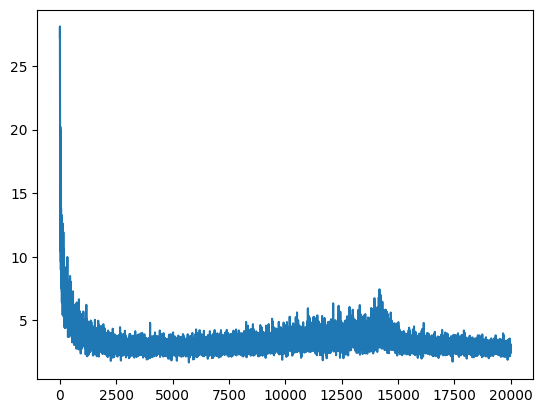

In [244]:
plt.plot(torch.arange(len(losses)), losses)

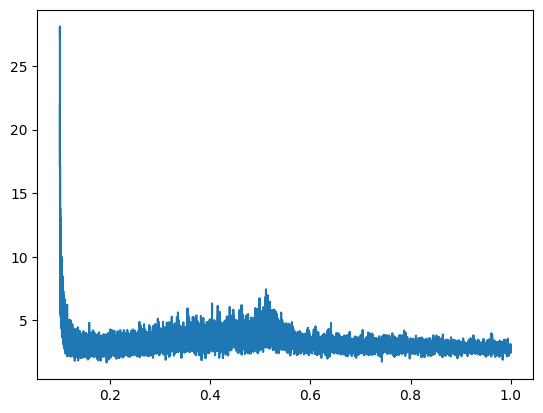

In [245]:
plt.plot(used_learning_rates, losses)